# Exploratory Data Analysis (EDA) of National Drug Seizures FY 21-24

### Devarsh Vanditkumar Joshi(100906815)
Drug trafficking poses a grave threat to public safety and national security. Analyzing drug seizure data provides an opportunity to identify geographical patterns, understand trafficking methods, and evaluate the effectiveness of law enforcement. This project delves into the Nationwide Drug Seizures dataset to extract actionable insights and inform strategies for combating this menace.  


--- 

## Objectives  

1. **Identify Regional Trends**:
   - Pinpoint regions with heightened drug-related activity.  
   - Determine the most prevalent drug categories within these regions.  
   
2. **Examine Temporal Patterns**:
   - Analyze seasonal and annual trends in drug seizure incidents and quantities.  
   - Identify peak periods of activity to refine enforcement approaches.  

3. **Evaluate Trafficking Methods**:  
   - Investigate seizure patterns based on trafficking modes, including land, air, and sea.  

---

## Approach  

Using Python-based data analysis tools, this project will examine the dataset through:  
- **Data Cleaning**: Ensuring the dataset is free from inconsistencies and missing values.  
- **Visualizations**: Using advanced visualizations to uncover patterns.  



---

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import numpy as np


plt.style.use('dark_background')
# Load the dataset
data = pd.read_csv('nationwide-drugs-fy21-fy24.csv')

# Data Cleaning
data.rename(columns={'Sum Qty (lbs)': 'Weight (lbs)'}, inplace=True)
data['Land Filter'] = data['Land Filter'].str.strip().str.upper()

data.head()


,FY,Month (abbv),Component,Region,Land Filter,Area of Responsibility,Drug Type,Count of Event,Weight (lbs)
0,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Cocaine,1,19.224309
1,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Khat (Catha Edulis),2,4.416741
2,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Marijuana,12,161.359636
3,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Other Drugs**,4,6.020383
4,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,BALTIMORE FIELD OFFICE,Cocaine,2,9.237369


---

## Dataset Description

The dataset includes detailed information about drug seizures across various regions in the United States. Key attributes of the dataset are as follows:

- **Region**: The geographical area where the event occurred.
- **Drug Type**: The type of drug involved in the seizure.
- **Count of Event**: The number of incidents or seizures recorded for a specific drug type.
- **Sum Qty (lbs)**: The total weight of drugs seized, measured in pounds.
- **Land Filter**: Indicates the mode of trafficking.
- **Component**: The enforcement agency responsible for the seizure.

### Observations:
- The dataset spans multiple years and includes detailed records, enabling temporal and regional analyses.
- Drug types show significant variation in quantity and frequency across regions.
- The dataset provides a strong foundation for understanding trafficking patterns and enforcement effectiveness.


---

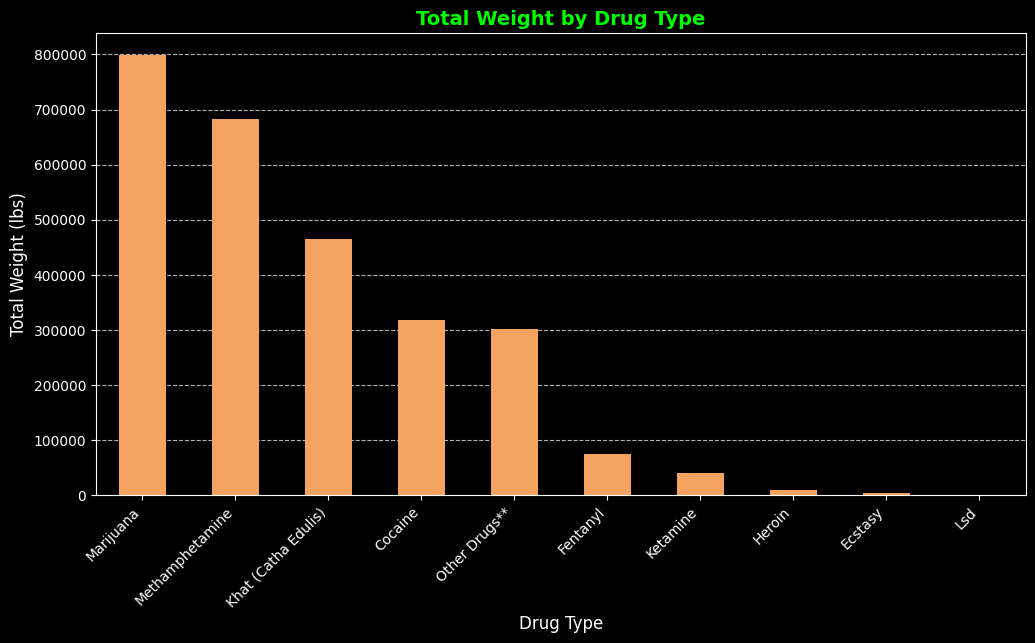

In [41]:

# Total Weight by Drug Type
total_weight_by_drug = data.groupby('Drug Type')['Weight (lbs)'].sum()

# Plotting
plt.figure(figsize=(12, 6))
total_weight_by_drug.sort_values(ascending=False).plot(kind='bar', color='sandybrown', zorder=2)
plt.title('Total Weight by Drug Type', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Drug Type', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.show()


---

## Total Weight by Drug Type

The bar chart above illustrates the total weight of different drug types seized, measured in pounds. The analysis reveals the following key insights:

**Questions Addressed**:
1. Which drugs are most prevalent by weight?
2. How does the distribution of synthetic drugs compare to traditional ones?

### Key Observations:
1. **Marijuana** dominates the dataset, accounting for the highest weight among all drug types, far exceeding others.
2. **Methamphetamine** and **Khat (Catha Edulis)** also contribute significantly to the total weight, indicating their prevalence in drug trafficking activities.
3. **Cocaine** follows as another prominent drug type, although its total weight is considerably lower than the top three.
4. Other drugs, including **Fentanyl**, **Ketamine**, and **Heroin**, have much lower quantities in comparison but are still critical due to their potency and impact.

### Insights:
- **Marijuana**'s overwhelming dominance highlights its widespread nature in trafficking and seizures.
- The presence of synthetic drugs like **Methamphetamine** and **Fentanyl** indicates the evolving nature of drug production and distribution.


---

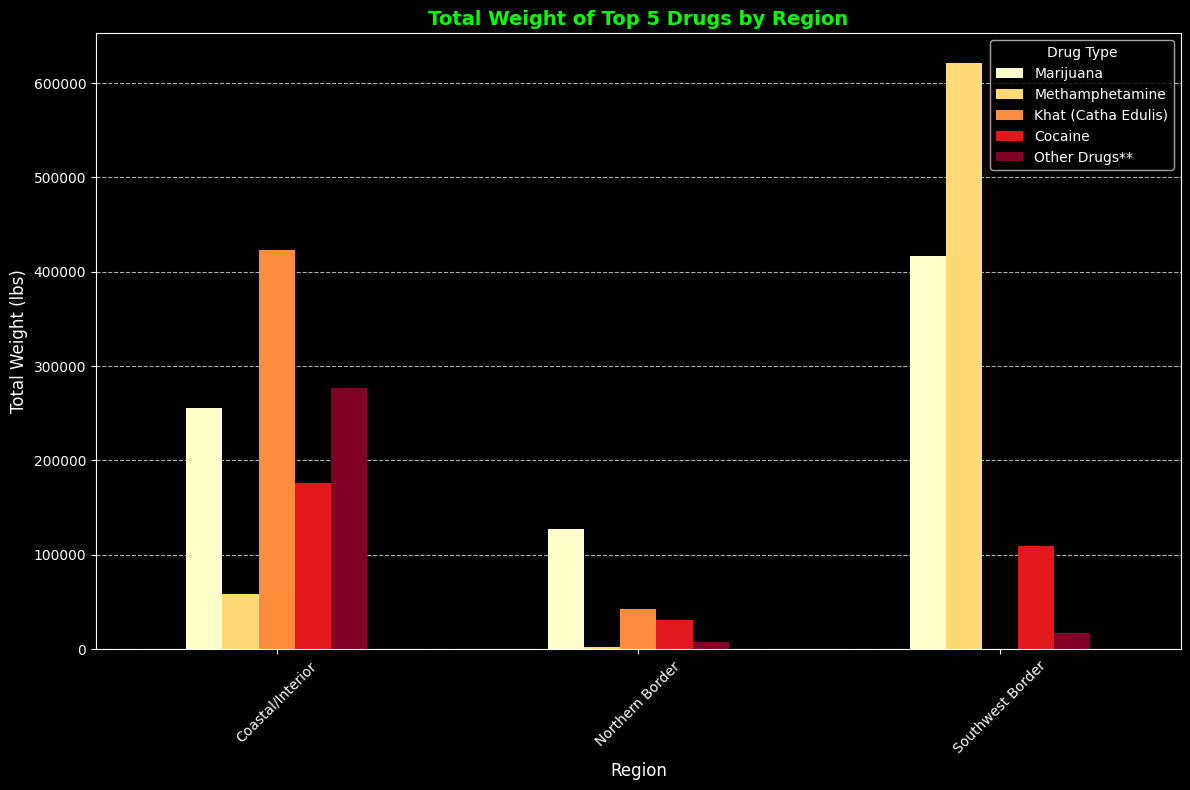

In [42]:

# Regional Trends for Top 5 Drugs
top_5_drugs = total_weight_by_drug.nlargest(5).index
region_drug_trends = data.groupby(['Region', 'Drug Type'])['Weight (lbs)'].sum().unstack()

region_drug_trends_top5 = region_drug_trends[top_5_drugs]

# Plotting
region_drug_trends_top5.plot(kind='bar', figsize=(14, 8), colormap='YlOrRd', zorder=2)
plt.title('Total Weight of Top 5 Drugs by Region', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.legend(title='Drug Type', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.show()


---

## Regional Trends for Top 5 Drugs

The bar chart above illustrates the total weight (in pounds) of the top 5 drugs seized across different regions. Each bar represents a drug type within a specific region, providing insights into the geographical distribution of drug seizures.

### Questions Answered:
1. How does the contribution of specific drugs vary across regions?
2. Are there significant differences in drug types across regions?
3. Are there specific drugs that should be prioritized for enforcement in certain regions?

### Key Observations:
1. **Coastal/Interior Region**:
   - This region shows the highest total weight across all drug types, with **Khat (Catha Edulis)** and **Cocaine** contributing significantly.
   - **Marijuana** also forms a substantial part of the seizures in this region.

2. **Northern Border**:
   - **Marijuana** dominates the seizures in this region, with relatively smaller contributions from other drug types.

3. **Southwest Border**:
   - **Methamphetamine** leads the drug seizures in this region, followed by Marijuana.
   - Other drugs such as Cocaine and Khat are less prominent here.

### Insights:
- The **Coastal/Interior** region has a diverse and high-volume distribution of drug types, indicating it as a critical area for trafficking activities.
- **Methamphetamine** dominates in the **Southwest Border**, suggesting a focus on synthetic drug trafficking in this area.
- **Marijuana** remains a consistent and significant contributor across all regions.




---

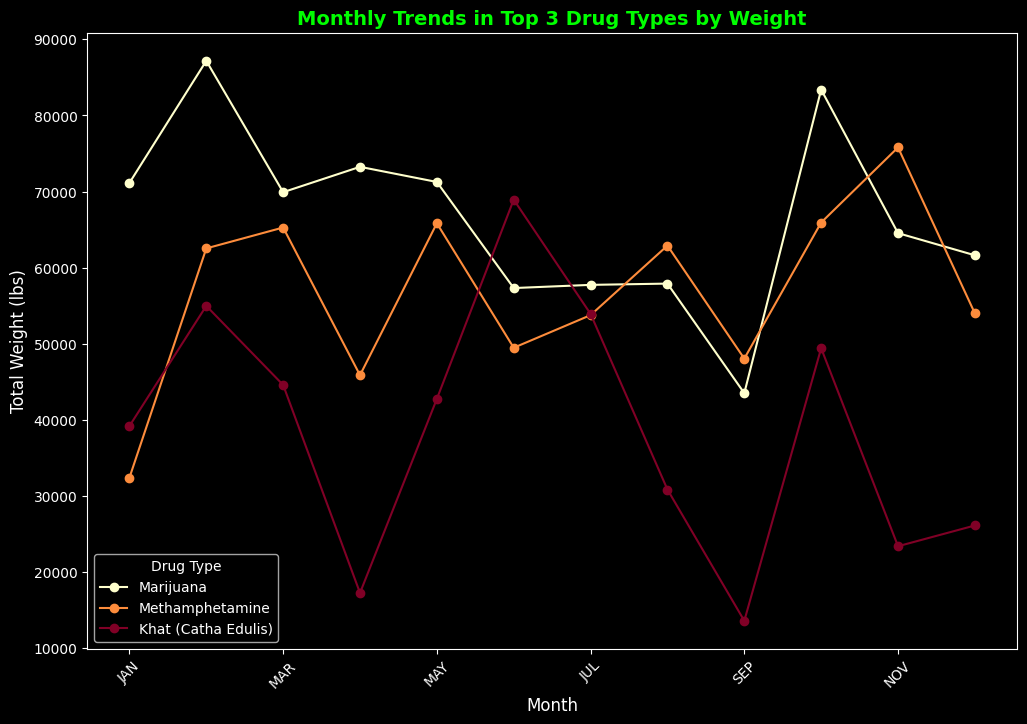

In [43]:

# Monthly Trends in Top 5 Drug Types by Weight

top_3_drugs = total_weight_by_drug.nlargest(3).index
region_drug_trends = data.groupby(['Region', 'Drug Type'])['Weight (lbs)'].sum().unstack()

month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
drug_trends = data.groupby(['Month (abbv)', 'Drug Type'])['Weight (lbs)'].sum().unstack()
drug_trends = drug_trends.reindex(month_order)

# Plotting
drug_trends[top_3_drugs].plot(figsize=(12, 8), marker='o', colormap='YlOrRd')
plt.title('Monthly Trends in Top 3 Drug Types by Weight', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.legend(title='Drug Type', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.0)
plt.xticks(rotation=45)
plt.show()



---

## Monthly Trends in Top 3 Drug Types by Weight

The line chart above displays the monthly trends in the total weight (in pounds) of the top 3 drug types seized. This visualization helps in understanding the temporal patterns for the most significant drug types.

### Questions Answered:
1. Are there specific months with consistently high activity for any of the top 3 drugs?
2. Do the trends indicate any emerging or declining popularity of specific drugs over the months?
3. Can these monthly trends guide enforcement agencies in planning resource allocation for high-activity periods?

### Key Observations:
1. **Marijuana**:
   - Consistently shows high weights throughout the year, with noticeable peaks in specific months.
   - Suggests consistent trafficking activity with periodic spikes.

2. **Methamphetamine**:
   - Exhibits more fluctuation compared to **Marijuana**, with significant peaks and drops across the months.
   - Indicates seasonality or specific operational patterns in trafficking.

3. **Khat (Catha Edulis)**:
   - Displays irregular patterns with occasional spikes, suggesting occasional trafficking events rather than steady activity.

### Insights:
- The temporal trends highlight the need for region-specific and time-sensitive enforcement measures.
- Spikes in specific months can help law enforcement focus their resources during high-activity periods for certain drugs.
- The fluctuation in Methamphetamine and Khat activities may correspond to changes in supply chains or enforcement effectiveness.



---

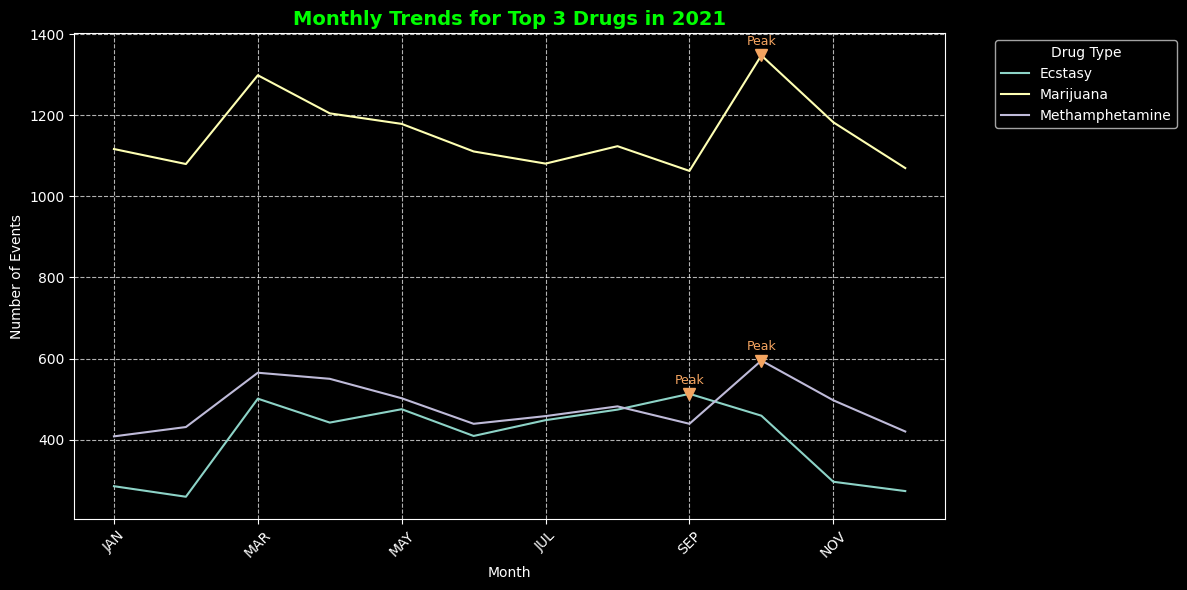

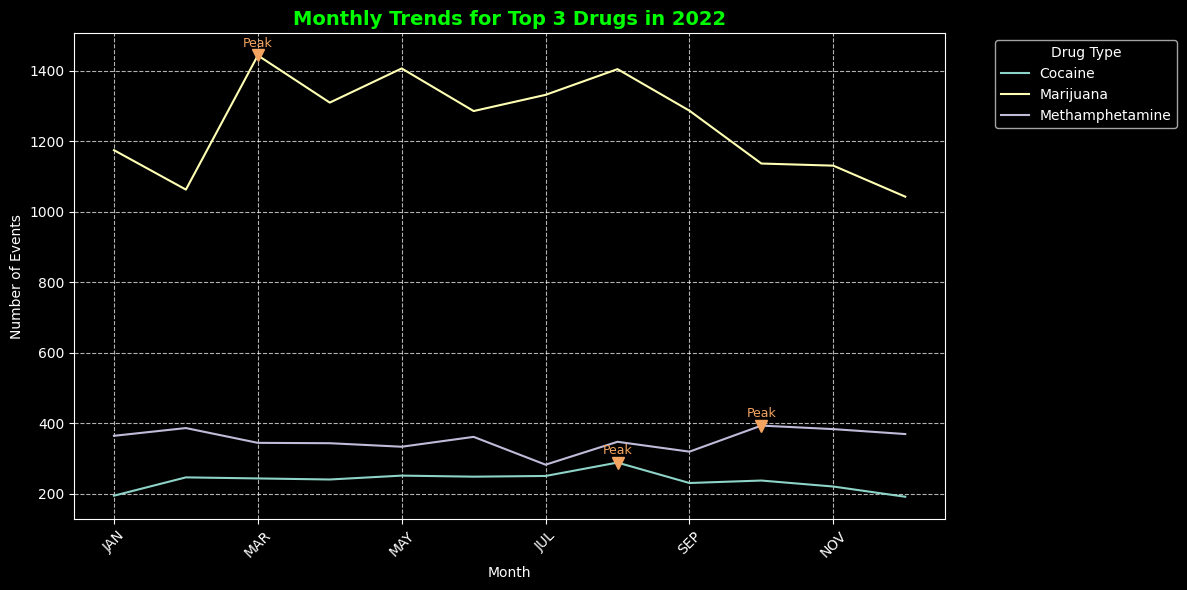

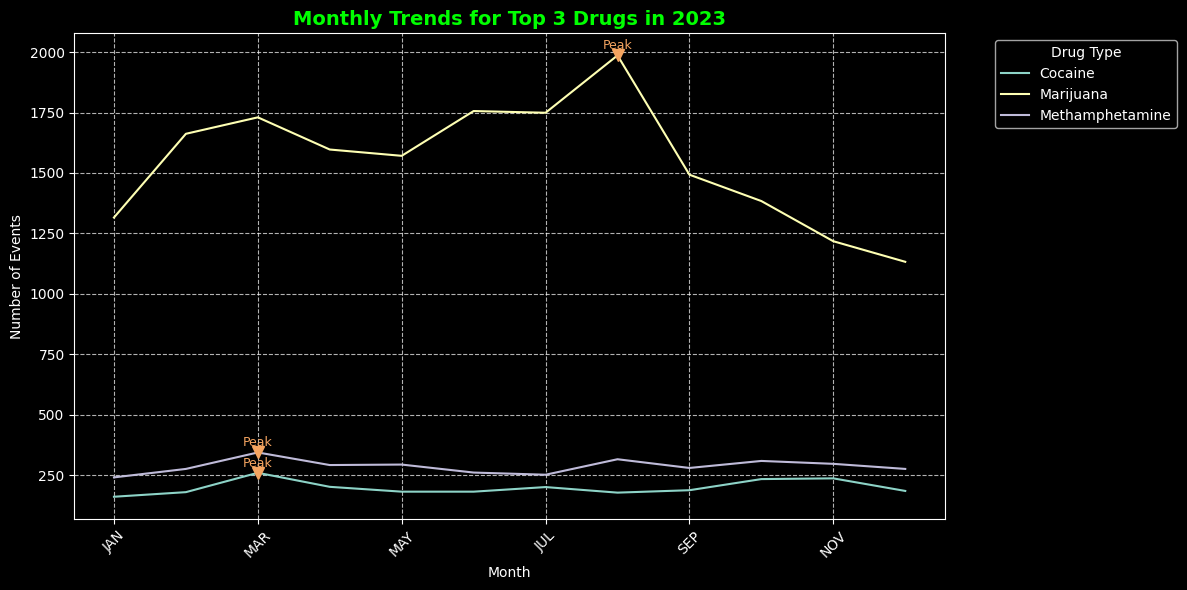

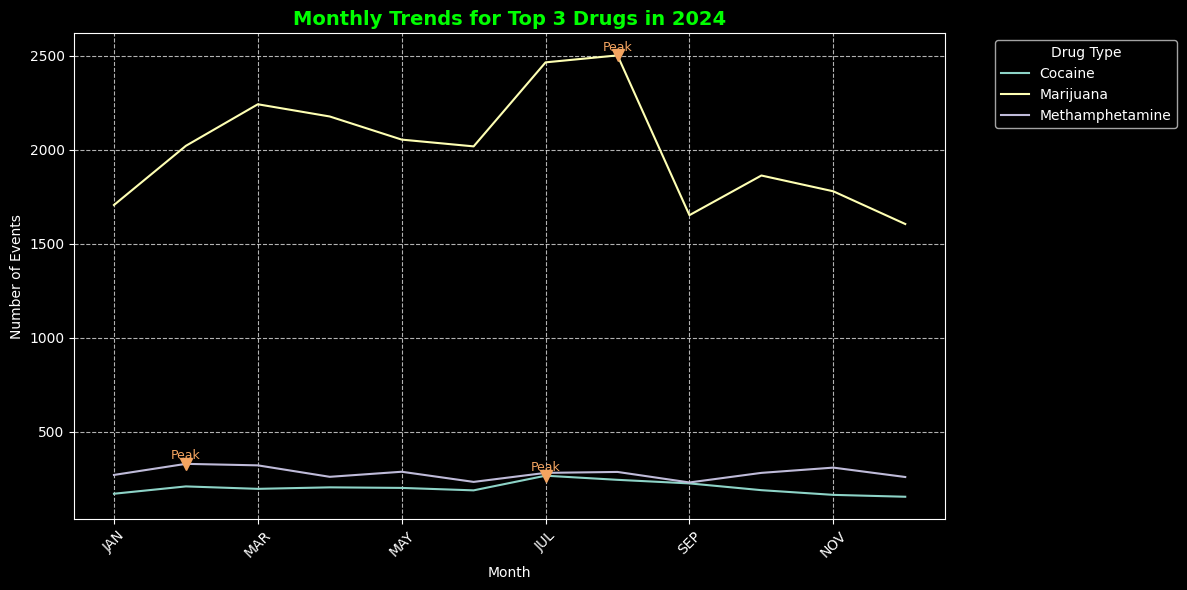

In [51]:
# Monthly Trends in Top 3 Drug Types by Events per year

filtered_data_no_other = data[data['Drug Type'] != 'Other Drugs**']
top_3_drugs_per_year = (
    filtered_data_no_other.groupby(['FY', 'Drug Type'])['Count of Event']
    .sum()
    .reset_index()
    .sort_values(by=['FY', 'Count of Event'], ascending=[True, False])
)

# Create a dictionary of top 3 drugs per year
top_3_per_year = (
    top_3_drugs_per_year.groupby('FY')['Drug Type']
    .apply(lambda x: x.head(3).tolist())
    .to_dict()
)

# Generate plots for each year
unique_years = sorted(filtered_data_no_other['FY'].unique())

for year in unique_years:
    # Filter data for the year and top 3 drugs
    year_top_3_drugs = top_3_per_year[year]
    year_data = filtered_data_no_other[
        (filtered_data_no_other['FY'] == year) & (filtered_data_no_other['Drug Type'].isin(year_top_3_drugs))
    ]

    # Aggregating monthly data for the top 3 drugs
    monthly_data = year_data.groupby(['Month (abbv)', 'Drug Type'])['Count of Event'].sum().reset_index()

    # Pivot data for plotting
    monthly_pivot = monthly_data.pivot_table(
        index='Month (abbv)', columns='Drug Type', values='Count of Event', fill_value=0
    )

    # Sorting months for proper order
    monthly_pivot = monthly_pivot.reindex(month_order)


    # Plotting the data
    ax = monthly_pivot.plot(kind='line', figsize=(12, 6), zorder=2)
    
    for drug in year_top_3_drugs:
        if drug in monthly_pivot.columns:
            peak_month = monthly_pivot[drug].idxmax()  
            peak_value = monthly_pivot[drug].max()  
            peak_index = month_order.index(peak_month)  
            ax.plot(peak_index, peak_value, marker='v', color='sandybrown', markersize=8)  
            ax.text(
                peak_index, peak_value + 25, 'Peak', fontsize=9, color='sandybrown', ha='center'
            )


    plt.title(f'Monthly Trends for Top 3 Drugs in {year}', fontsize=14, fontweight='bold', color='lime')
    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
    plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=1)

    plt.show()


---

## Monthly Trends in Top 3 Drug Types by Events per Year

This visualization analyzes the monthly trends in the top 3 drug types for each year based on the number of events. We approached to events, as although we considered the weight analsis, it cannot be trusted as some synthetic drugs which weigh less, can be as bad of a problem as traditional drugs. The chart displays separate lines for each drug type, showing how their activity fluctuates over the months.

### Questions Answered
1. Are there discernible patterns that indicate emerging or declining trafficking trends for specific drugs?
2. Do the trends indicate any emerging or declining popularity of specific drugs over the years?
3. Can this data aid enforcement agencies in identifying peak periods for focused intervention?

### Key Observations:
1. **Drug-Specific Observations**:
   - **Marijuana**:
     - Maintains a strong presence throughout the years with notable peaks, such as March in 2021 and July in 2024.
   - **Methamphetamine**:
     - Exhibits fluctuating patterns with prominent spikes, suggesting operational bursts in its trafficking supply chain.
   - **Cocaine**:
     - While less dominant, **Cocaine** displays a steady presence, with sporadic peaks indicating targeted trafficking efforts.

2.  **Fluctuations in Seizures**:
   - The varying patterns across months and years suggest adaptive strategies employed by traffickers to evade detection or capitalize on specific market demands.

### Insights:
- **Marijuana** consistently appears as a dominant drug type across all years, reflecting its persistent trafficking trends.
- Each year demonstrates distinct patterns for event counts, indicating potential shifts in trafficking trends or enforcement priorities.
- **Methamphetamine** shows significant peaks in September for certain years, which may indicate seasonal trafficking trends or enforcement spikes.


---

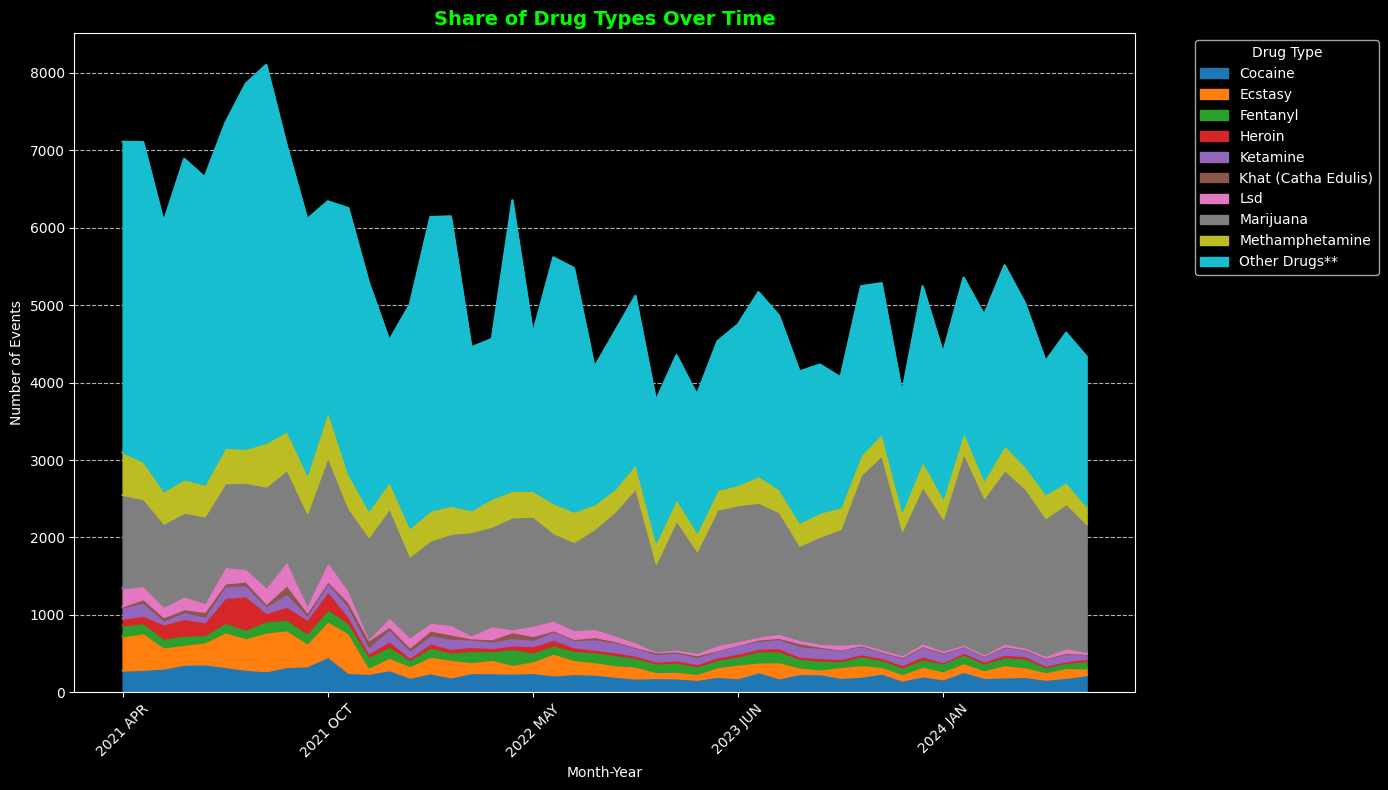

In [45]:
#Share of Each Drug Types over Time

#Preparing data
time_series = data.groupby(['FY', 'Month (abbv)', 'Drug Type'])[['Count of Event']].sum().reset_index()

area_chart_data = time_series.pivot_table(index=['FY', 'Month (abbv)'], columns='Drug Type', values='Count of Event', aggfunc='sum', fill_value=0).reset_index()

# Aggregating data for visualization
area_chart_data['Month-Year'] = area_chart_data['FY'].astype(str) + " " + area_chart_data['Month (abbv)']
area_chart_data = area_chart_data.drop(columns=['FY', 'Month (abbv)']).set_index('Month-Year')

# Stacked area chart
area_chart_data.plot(kind='area', figsize=(14, 8), stacked=True, colormap='tab10', zorder=2)
plt.title('Share of Drug Types Over Time', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Month-Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()


---

## Share of Each Drug Type Over Time

The stacked area chart above represents the share of different drug types over time, measured by the number of events in each month-year. The visualization provides insights into how the distribution of drug types has evolved over time.

### Questions Ansswered:
1. How does the volume of seizures for specific drug types fluctuate within the observed timeframe?
2. Are there any noticeable trends or consistent patterns in the share of specific drugs over the months and years?
3. Which drug types consistently dominate the share of seizures?

### Key Observations:
1. **Marijuana**:
   - Consistently contributes the largest share of events over time, with fluctuations indicating possible changes in trafficking activity.
2. **Other Drugs**:
   - This category forms a significant proportion of the events, highlighting the diversity of lesser-known drug types.
3. **Methamphetamine and Cocaine**:
   - These drugs show noticeable activity, with **Methamphetamine** maintaining a consistent presence.
4. **Emerging Trends**:
   - Drugs like **Fentanyl** and **Khat (Catha Edulis)** show irregular but increasing trends, indicating their growing importance.

### Insights:
- The dominance of **Marijuana** suggests it remains a primary focus for enforcement efforts.
- The relative stability of certain drugs like **Methamphetamine** contrasts with the fluctuating presence of others, hinting at differences in supply chains or enforcement success.
- The temporal trends help in identifying months or periods with spikes, allowing for targeted interventions.



---

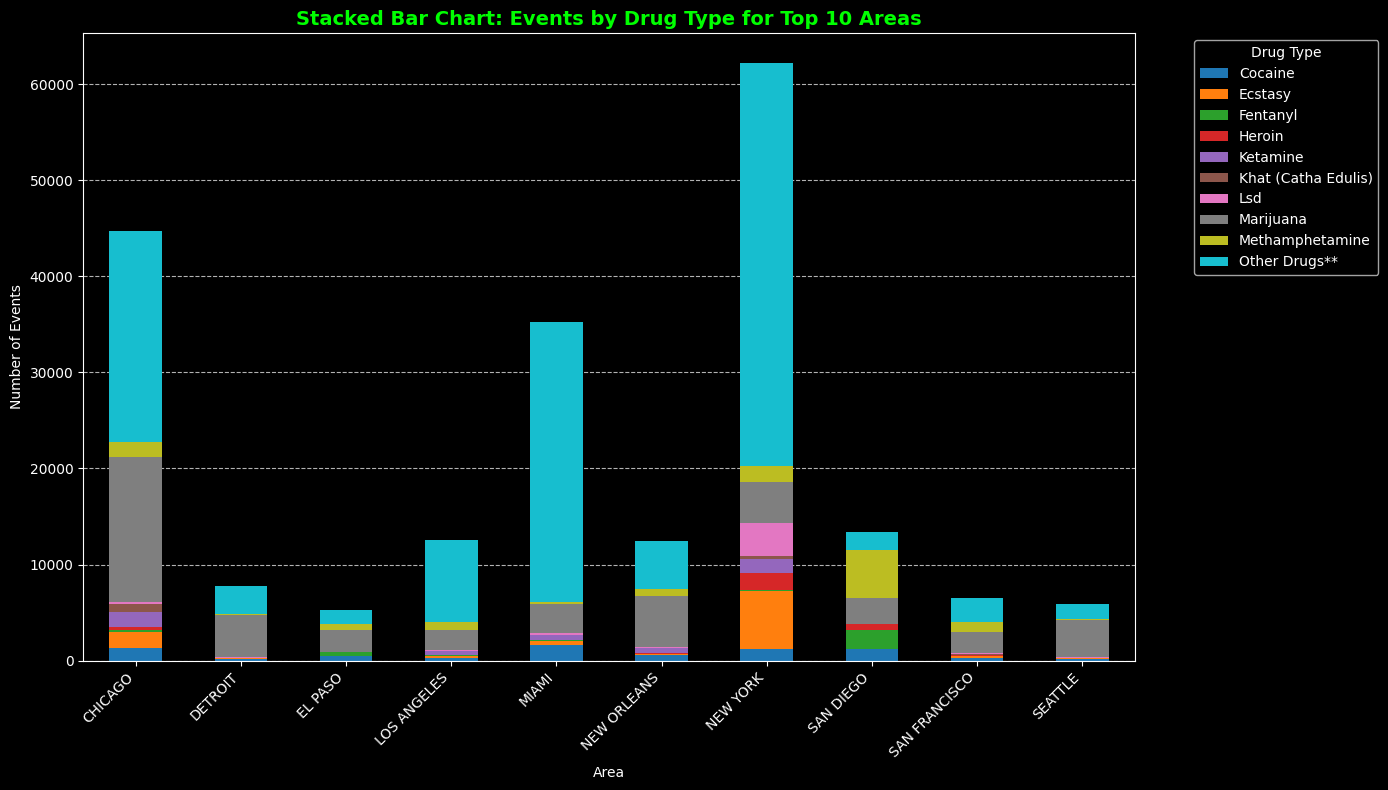

In [46]:
# Aggregating data for a treemap: Event counts by AOR and drug type
data['Area'] = data['Area of Responsibility'].str.replace(" FIELD OFFICE", "", regex=False)

treemap_data = data.groupby(['Area', 'Drug Type'])['Count of Event'].sum().reset_index()


# Constructing labels for the treemap
treemap_data['Label'] = (
    treemap_data['Area'] + "\n" + treemap_data['Drug Type'] + "\n" +
    treemap_data['Count of Event'].astype(str) + " events"
)


top_aors = treemap_data.groupby('Area')['Count of Event'].sum().nlargest(10).index
top_aors_data = treemap_data[treemap_data['Area'].isin(top_aors)]

pivot_data = top_aors_data.pivot_table(
    index='Area', 
    columns='Drug Type', 
    values='Count of Event', 
    aggfunc='sum', 
    fill_value=0
)

# Visualizing the treemap using a bar chart alternative
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10', zorder=2)
plt.title('Stacked Bar Chart: Events by Drug Type for Top 10 Areas', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Area')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.show()


---

## Stacked Bar Chart: Events by Drug Type for Top 10 Areas

The stacked bar chart above showcases the distribution of drug-related events across the top 10 areas of responsibility. Each bar represents the total number of events in a specific area, broken down by drug type.

### Questions Answered:
1. Are specific areas dominated by certain drug types, indicating localized trafficking patterns?
2. Do larger metropolitan areas show a higher diversity of drug types compared to smaller cities?
3. What insights can be drawn regarding the consistency or variability of drug presence across the top regions?

### Key Observations:
1. **New York**:
   - This area has the highest number of drug-related events, with a significant contribution from **Other Drugs** and **Marijuana**.
2. **Chicago and Miami**:
   - These areas also show high levels of activity, with **Methamphetamine** and **Cocaine** contributing prominently.
3. **Regional Trends**:
   - Some areas, like **San Francisco** and **Seattle**, show a more evenly distributed mix of drug types, indicating diverse trafficking patterns.

### Insights:
- The dominance of certain areas like **New York** and **Chicago** suggests these are critical hotspots for drug-related activities.
- The variation in drug type contributions across areas indicates that trafficking strategies and enforcement challenges vary geographically.
- Targeted enforcement efforts in the highlighted areas could significantly reduce the overall impact of drug trafficking.



---

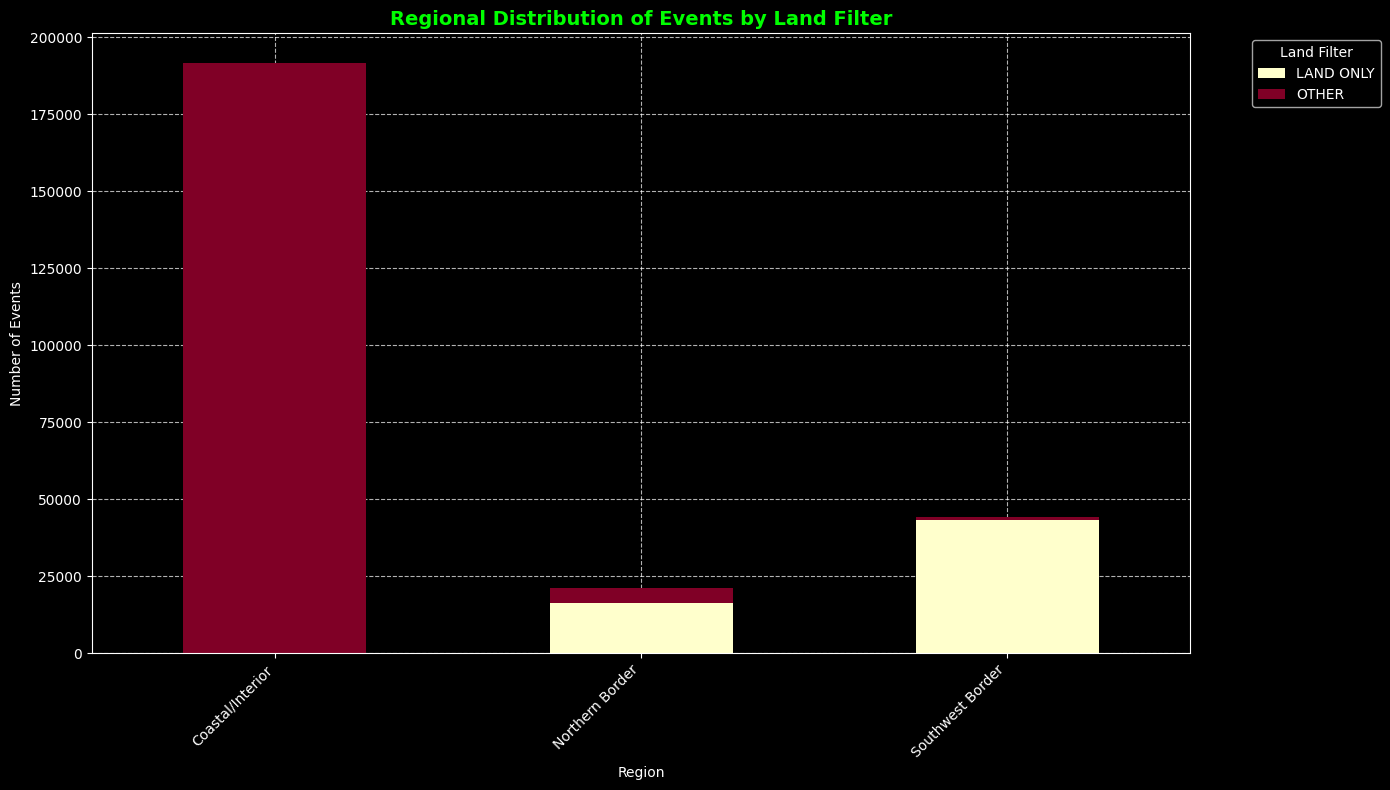

In [47]:
# Aggregating data for regional analysis with land filter
regional_land_filter = data.groupby(['Region', 'Land Filter'])['Count of Event'].sum().unstack(fill_value=0)

# Plotting a stacked bar chart for events by region and land filter
regional_land_filter.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='YlOrRd', zorder=2)
plt.title('Regional Distribution of Events by Land Filter', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Land Filter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()


---

## Regional Distribution of Events by Land Filter

The bar chart above illustrates the regional distribution of drug-related events, categorized by the **Land Filter** variable, which identifies whether the seizure occurred via land or other methods.

### Questions Answered:
1. Which regions have the highest number of drug events?
2. Does the high volume of events in the Coastal/Interior region suggest gaps in monitoring non-land-based methods?
3. Are certain regions more reliant on land-based trafficking compared to others?

### Key Observations:
1. **Coastal/Interior Region**:
   - This region dominates the chart, with the majority of events categorized as **OTHER**.
   - Indicates significant activity involving non-land-based trafficking methods.
2. **Southwest Border**:
   - This region has the highest number of **LAND ONLY** events, suggesting land is the predominant mode of trafficking.
3. **Northern Border**:
   - Exhibits relatively low event counts compared to other regions, with a mix of both land and other modes.

### Insights:
- The **Coastal/Interior region's dominance** in "OTHER" events highlights its role as a key trafficking hub for non-land methods.
- The **Southwest Border** is heavily reliant on land routes, suggesting that enforcement efforts in this region should focus on land-based transportation methods.
- Understanding these distributions helps prioritize resources for specific regions and trafficking modes, enabling more efficient and targeted interventions.



---

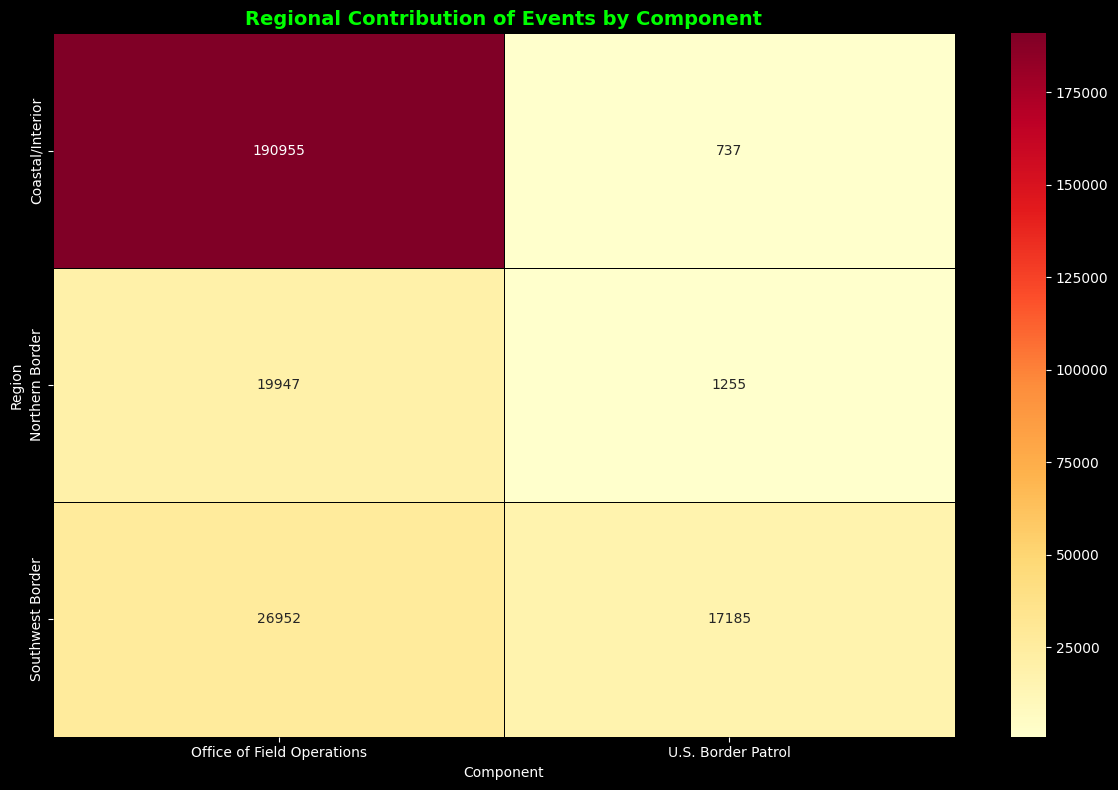

In [48]:
# Aggregating data for regional contribution by component
regional_component_data = data.groupby(['Region', 'Component'])['Count of Event'].sum().unstack(fill_value=0)

# Plotting a heatmap for regional contributions by component
plt.figure(figsize=(12, 8))
sns.heatmap(regional_component_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor='black')
plt.title('Regional Contribution of Events by Component', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Component')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


---

## Regional Contribution of Events by Component

The heatmap above visualizes the contribution of different components to drug-related events across various regions. The **Office of Field Operations** and **U.S. Border Patrol** are the two primary components contributing to the event counts.

### Questions Answered:
1. Which regions are predominantly handled by each enforcement component?
2. How do different regions contribute to the volume of drug-related events for each enforcement component?
3. Does the low activity in certain regions suggest gaps in operations by either of the components?

### Observations:
1. **Coastal/Interior Region**:
   - The **Office of Field Operations** dominates, contributing the highest number of events (190,955), with minimal input from the **U.S. Border Patrol**.
2. **Southwest Border**:
   - Both components contribute significantly, though the **Office of Field Operations** maintains a higher share.
3. **Northern Border**:
   - The event count is relatively low compared to other regions, with a marginal contribution from the **U.S. Border Patrol**.

### Insights:
- The **Office of Field Operations** is the primary contributor across all regions, highlighting its critical role in enforcement activities.
- The **Southwest Border** sees a more balanced contribution from both components, suggesting varied enforcement strategies.
- The **Coastal/Interior region's** reliance on the **Office of Field Operations** suggests a focus on specific types of trafficking activities.


---

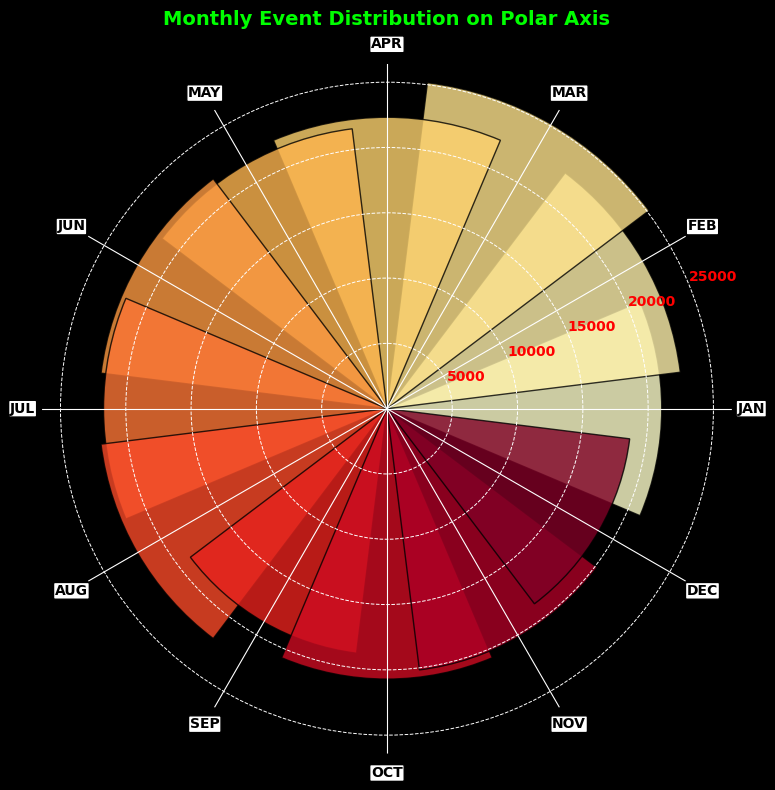

In [49]:
# Preparing data for a polar bar chart
monthly_events = data.groupby('Month (abbv)')['Count of Event'].sum().reindex(month_order)

angles = np.linspace(0, 2 * np.pi, len(month_order), endpoint=False).tolist()

# Plotting the bar chart on polar axis
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

bars = ax.bar(
    angles, monthly_events, align='center', alpha=0.8, edgecolor="black",
    color=plt.cm.YlOrRd(np.linspace(0, 1, len(month_order)))
)

ax.set_xticks(angles)
ax.set_xticklabels(month_order, fontsize=10, fontweight='bold')
ax.yaxis.grid(color='white', linestyle='--', linewidth=0.7)
ax.spines['polar'].set_visible(False)
ax.tick_params(axis='y', colors='red')
ax.tick_params(axis='x', colors='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

for label in ax.get_xticklabels():
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1'))


plt.title('Monthly Event Distribution on Polar Axis', va='bottom', fontsize=14, fontweight='bold', color='lime')
plt.tight_layout()
plt.show()



---

## Monthly Event Distribution on Polar Axis

The polar bar chart above visualizes the distribution of drug-related events across months, providing a unique perspective on temporal trends.

### Questions Answered:
1. Are there specific months with consistently higher event counts?
2. Can this temporal distribution guide resource allocation for high-activity periods?
3. Which months require intensified enforcement measures based on higher activity?


### Key Observations:
1. **Peak Months**:
   - The highest activity is observed in **January**, as indicated by the longest and darkest bar.
2. **Seasonal Trends**:
   - Activity gradually reduces in the summer months (**June–August**) and picks up towards the end of the year (**November–December**).
3. **Even Distribution**:
   - Although some months like **January** and **February** stand out, there is a relatively even spread of events throughout the year, indicating consistent trafficking activity.

### Insights:
- The polar chart provides a clear visual representation of temporal trends, making it easy to identify seasonal peaks and troughs.
- Enforcement agencies can use this insight to allocate resources more effectively during high-activity months, especially at the start and end of the year.
- The consistent activity suggests that trafficking is a year-round issue, requiring continuous monitoring.



---

In [50]:

# Summary Statistics
summary_stats = data.describe()
summary_stats


,FY,Count of Event,Weight (lbs)
count,9866.000000,9866.000000,9866.000000
mean,2022.485100,26.052199,272.837338
std,1.126032,97.777970,1192.413999
min,2021.000000,1.000000,0.000000
25%,2021.000000,1.000000,0.117336
50%,2022.000000,5.000000,5.006103
75%,2024.000000,17.000000,81.681804
max,2024.000000,1925.000000,27884.986666


---

# Conclusion

This project successfully conducted an in-depth Exploratory Data Analysis (EDA) on the Nationwide Drug Seizures dataset, uncovering key patterns, trends, and insights. The analysis focused on regional, temporal, and categorical distributions of drug-related events, providing valuable inputs for enforcement and policymaking.

### Summary of Key Findings:
1. **Regional Insights**:
   - The **Coastal/Interior Region** consistently recorded the highest number of drug-related events, largely dominated by non-land-based trafficking methods.
   - The **Southwest Border** showed significant land-based activity, highlighting its role in land trafficking.

2. **Drug Type Trends**:
   - **Marijuana** emerged as the most frequently seized drug across all regions and time periods.
   - Synthetic drugs like **Methamphetamine** and emerging substances like **Fentanyl** demonstrated fluctuating but growing trends, indicating evolving trafficking dynamics.

3. **Temporal Analysis**:
   - Seasonal trends were evident, with peak activity observed in **January** and a decline during the summer months.
   - The consistency of events across most months suggests that trafficking is not limited to specific periods but requires year-round enforcement efforts.

4. **Land and Component Contribution**:
   - The **Office of Field Operations** played a dominant role in enforcement activities across all regions, with the **U.S. Border Patrol** contributing significantly at the **Southwest Border**.
   - Regional variations in trafficking modes were clearly highlighted, aiding in understanding the operational challenges faced by different enforcement agencies.

---

## References

1. **Libraries Used**:
   - **Pandas**: For data manipulation and cleaning. Documentation available at [Pandas Documentation](https://pandas.pydata.org/docs/).
   - **Matplotlib/Seaborn**: For data visualization. Documentation available at [Matplotlib Documentation](https://matplotlib.org/stable/contents.html) and [Seaborn Documentation](https://seaborn.pydata.org/).
   - **NumPy**: For numerical analysis. Documentation available at [NumPy Documentation](https://numpy.org/doc/).

2. **Dataset Source**:  
   - [Nationwide Drug Seizures Dataset](https://www.cbp.gov/document/stats/nationwide-drug-seizures)  
     This dataset was used for exploratory data analysis and question-driven insights in this notebook.

3. **Large Language Models (LLMs)**:  
   - **ChatGPT** was used for generating text contributions to the notebook. The prompts used include:
     - "Web scrape some ideas to show how to start an introduction explaining the purpose of using the Nationwide Drug Seizures dataset."
     - "What are the best practices for a clean structure in a Jupyter Notebook, and how to beautify some parts of it."
     - "Best practices when conducting Exploratory Data Analysis on a .csv dataset."

4. **Data Science Workflow Reference**:  
   - O’Neil, C., & Schutt, R. (2014). *Doing Data Science* (1st ed.). O'Reilly Media.  
     The data science workflow mentioned in the assignment was referenced during the project's development.

5. **Online Resources**:
   - **Markdown Syntax Reference**: [GitHub Markdown Documentation](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)  
     Used to structure and format Markdown sections effectively.
   - **Python.org**: [Python Language Reference](https://docs.python.org/3/)  
     Official documentation for Python programming language features used in this project.
